In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 8.9 MB/s 
     |████████████████████████████████| 16.7 MB 410 kB/s 
     |████████████████████████████████| 6.3 MB 49.3 MB/s 


In [2]:
import os as os
import geopandas
import glob as glob
import numpy as np
import pandas as pd
import datetime
import math
import calendar
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.io as sio
plt.style.use('ggplot')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving GSOD_daily_1973_2021.mat to GSOD_daily_1973_2021.mat


In [4]:
test = sio.loadmat('GSOD_daily_1973_2021.mat')
lat = test['LAT']
lon = test['LON']
name = test['NAME']
Tmean = test['T']
Tmin = test['TN']
Tmax = test['TX']
Dwp = test['Td']

In [5]:
lat = lat.flatten()
lon = lon.flatten()

In [6]:
NAME = []
for nst in range(len(name[0])):
    NAME.append(name[0][nst][0])
   

NAME = np.array(NAME)

In [7]:
cal = pd.date_range('01-01-1973','12-31-2021',freq='D')
df_Tmin = pd.DataFrame(data=Tmin,index=cal,columns=NAME)

df_Tmax = pd.DataFrame(data=Tmax,index=cal,columns=NAME)

df_Tmean = pd.DataFrame(data=Tmean,index=cal,columns=NAME)

df_Dwp = pd.DataFrame(data=Dwp,index=cal,columns=NAME)

In [8]:
df_Tmin_djfm=df_Tmin[df_Tmin.index.month == 12]
df_Tmax_djfm=df_Tmax[df_Tmax.index.month == 12]
df_Tmean_djfm=df_Tmean[df_Tmean.index.month == 12]
df_Dwp_djfm=df_Dwp[df_Dwp.index.month == 12]

In [9]:
for nm in (1,2,3):
    
    df_Tmin_djfm = pd.concat([df_Tmin_djfm,df_Tmin[df_Tmin.index.month == nm]],axis=0)
    df_Tmax_djfm = pd.concat([df_Tmax_djfm,df_Tmax[df_Tmax.index.month == nm]],axis=0)
    df_Tmean_djfm = pd.concat([df_Tmean_djfm,df_Tmean[df_Tmean.index.month == nm]],axis=0)
    df_Dwp_djfm = pd.concat([df_Dwp_djfm,df_Dwp[df_Dwp.index.month == nm]],axis=0)
                  

In [10]:
df=df_Dwp_djfm.notnull().sum().reset_index()
df.columns=['Place','Non missing']
df

,Place,Non missing
0,TILLABERY,5341
1,TAHOUA,5376
2,GOURE,3948
3,NGUIGMI,5038
4,NIAMEY-AERO,5770
...,...,...
150,MANSA,383
151,ZAMBEZI,250
152,NDOLA,1224
153,KAOMA,452


In [11]:
df['%Non missing']=(df['Non missing']/df['Non missing'].sum())*100

In [12]:
df['lat']=lat
df['log']=lon

In [13]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.log, df.lat))

In [ ]:
gdf

,Place,Non missing,lat,log,geometry
0,TILLABERY,5341,14.200,1.450,POINT (1.45000 14.20000)
1,TAHOUA,5376,14.900,5.250,POINT (5.25000 14.90000)
2,GOURE,3948,13.983,10.300,POINT (10.30000 13.98300)
3,NGUIGMI,5038,14.250,13.117,POINT (13.11700 14.25000)
4,NIAMEY-AERO,5770,13.483,2.167,POINT (2.16700 13.48300)
...,...,...,...,...,...
150,MANSA,383,-11.100,28.850,POINT (28.85000 -11.10000)
151,ZAMBEZI,250,-13.533,23.117,POINT (23.11700 -13.53300)
152,NDOLA,1224,-13.000,28.650,POINT (28.65000 -13.00000)
153,KAOMA,452,-14.800,24.800,POINT (24.80000 -14.80000)


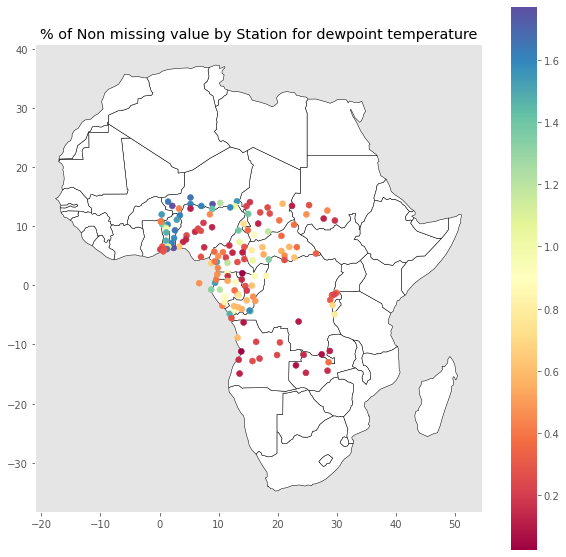

In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black',figsize=(10,10))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,legend=True,column =gdf['%Non missing'],cmap='Spectral')
plt.title('% of Non missing value by Station for dewpoint temperature');
plt.grid(False);
#plt.axis('off')




**PLot % of non missing values by year**

In [16]:
df=df_Dwp_djfm.notna().reset_index()
df.rename(columns={'index':'time'},inplace=True)
df

,time,TILLABERY,TAHOUA,GOURE,NGUIGMI,NIAMEY-AERO,DOSSO,BIRNI-NKONNI,MARADI,DIFFA,...,MONBACA (BENGUELA),HUAMBO (NOVA LISBOA,BIE (SILVA PORTO),LUBANGO (SA DA BAND,MWINILUNGA,MANSA,ZAMBEZI,NDOLA,KAOMA,KABWE
0,1973-12-01,True,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1973-12-02,True,True,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1973-12-03,True,True,False,True,True,False,True,True,False,...,True,True,False,True,False,False,False,False,False,False
3,1973-12-04,False,True,False,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1973-12-05,False,True,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,2021-03-27,True,True,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False
5937,2021-03-28,True,True,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False
5938,2021-03-29,True,True,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False
5939,2021-03-30,True,True,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,False,False


In [17]:
df['year']=df.time.dt.year

In [18]:
#non missing value
df1=df.groupby('year').sum()

df2=df1.sum(axis=1)/(121*155)*100
df2



year
1973    12.545988
1974    13.511064
1975    15.067982
1976    35.147961
1977    40.287923
1978    44.089576
1979    33.772327
1980    28.776326
1981    34.513463
1982    35.249267
1983    34.230872
1984    33.607038
1985    30.845108
1986    37.547321
1987    34.748067
1988    33.191149
1989    33.894961
1990    29.437483
1991    22.090109
1992    30.178619
1993    38.853639
1994    39.194881
1995    30.482538
1996    28.104505
1997    30.722474
1998    30.578512
1999    30.791789
2000    29.186883
2001    32.210077
2002    31.703546
2003    27.613970
2004    29.704079
2005    25.993069
2006    28.237803
2007    29.112237
2008    28.147161
2009    38.315116
2010    43.385764
2011    43.785657
2012    47.315383
2013    44.820048
2014    43.556385
2015    47.693948
2016    50.738470
2017    51.282325
2018    55.099973
2019    54.998667
2020    58.421754
2021    51.026393
dtype: float64

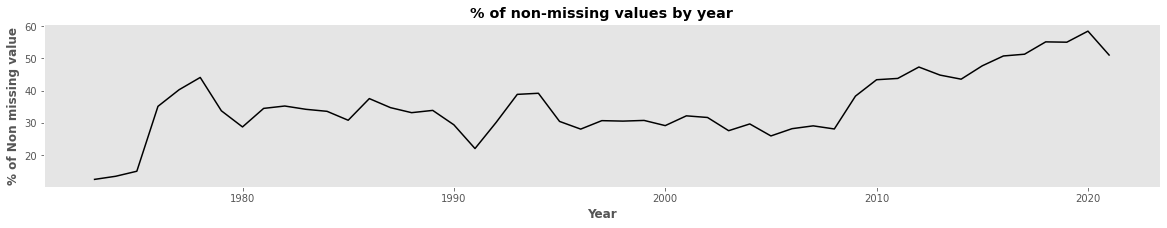

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df2.index,df2.values,color='black')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('% of Non missing value',fontweight='bold')
plt.title('% of non-missing values by year',fontweight='bold')
plt.grid(False);

**Q2) distribution of DPT values**

In [22]:
df_Dwp_djfm


,TILLABERY,TAHOUA,GOURE,NGUIGMI,NIAMEY-AERO,DOSSO,BIRNI-NKONNI,MARADI,DIFFA,ZINDER,...,MONBACA (BENGUELA),HUAMBO (NOVA LISBOA,BIE (SILVA PORTO),LUBANGO (SA DA BAND,MWINILUNGA,MANSA,ZAMBEZI,NDOLA,KAOMA,KABWE
1973-12-01,0.000000,-4.388889,NaN,NaN,-1.166667,NaN,NaN,1.222222,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-12-02,1.388889,-3.000000,NaN,3.666667,2.111111,NaN,1.777778,2.000000,NaN,1.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-12-03,-2.277778,-4.333333,NaN,4.500000,-0.333333,NaN,-0.611111,5.000000,NaN,2.555556,...,18.388889,14.166667,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1973-12-04,NaN,-3.777778,NaN,2.277778,2.000000,NaN,-0.500000,5.777778,NaN,5.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-12-05,NaN,-5.777778,NaN,1.500000,-0.666667,NaN,0.277778,NaN,NaN,4.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,0.944444,-14.388889,-3.166667,11.166667,-6.166667,1.166667,-3.722222,-5.166667,8.777778,-3.666667,...,NaN,NaN,15.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,-5.833333,-5.888889,-4.000000,1.111111,-6.777778,-1.000000,-3.222222,-3.666667,5.222222,-2.500000,...,NaN,NaN,15.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,-3.666667,-8.944444,-5.055556,-4.777778,-6.666667,-2.444444,-2.277778,-6.833333,2.277778,-4.222222,...,NaN,NaN,16.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-30,-6.111111,-16.222222,-4.055556,-0.888889,-9.388889,-3.055556,-5.555556,-9.611111,3.388889,-5.111111,...,NaN,NaN,16.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
products_list =df_Dwp_djfm.values.tolist()


In [24]:
list1=[]
import numpy as np
import math
for i in products_list:
  for j in i:
    if math.isnan(j)==False:
      list1.append(j)

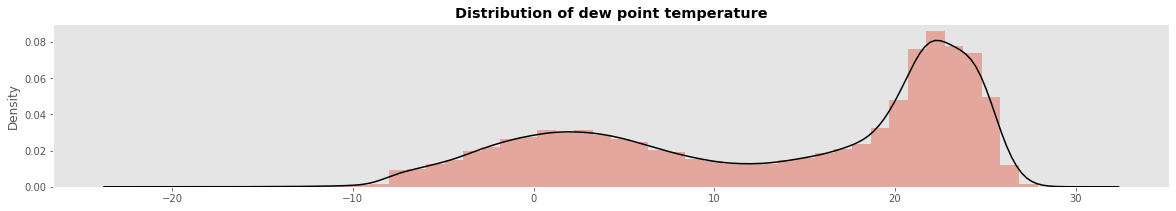

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
sns.distplot(list1,hist=True,kde_kws={'color':'black'})
plt.title('Distribution of dew point temperature',fontweight='bold')
plt.grid(False);

Q2)**map of raw number of days with DPT<14C(by month)**

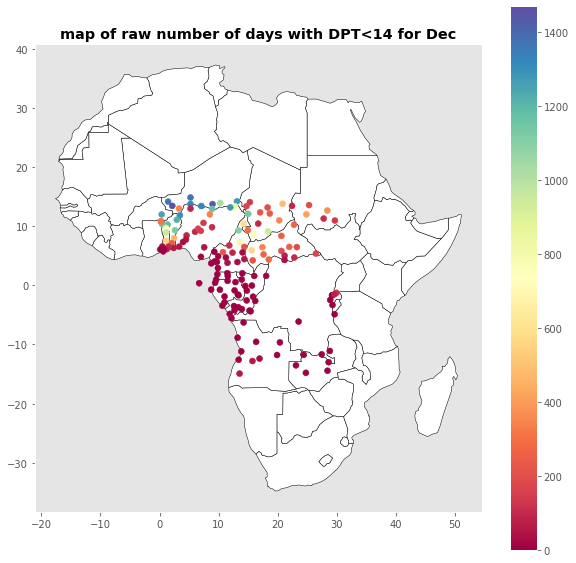

In [102]:
def plot(x):
  df=df_Dwp_djfm.apply(lambda x:x<14).reset_index()
  df.rename(columns={'index':'time'},inplace=True)
  df['month']=df.time.dt.month
  
  
  df1=df.groupby('month').sum().reset_index()
  df1.month=df1.month.map({1:'Jan',2:'Feb',3:'Mar',12:'Dec'})
  df1.set_index('month',inplace=True)
  df1.loc[x].values
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa.
  ax = world[world.continent == 'Africa'].plot(
      color='white', edgecolor='black',figsize=(10,10))

  # We can now plot our ``GeoDataFrame``.
  gdf.plot(ax=ax,legend=True,column =df1.loc['Jan'].values,cmap='Spectral')
  plt.title(f'map of raw number of days with DPT<14 for {x}',fontweight='bold')
  plt.grid(False);
  #plt.axis('off');

plot('Dec')

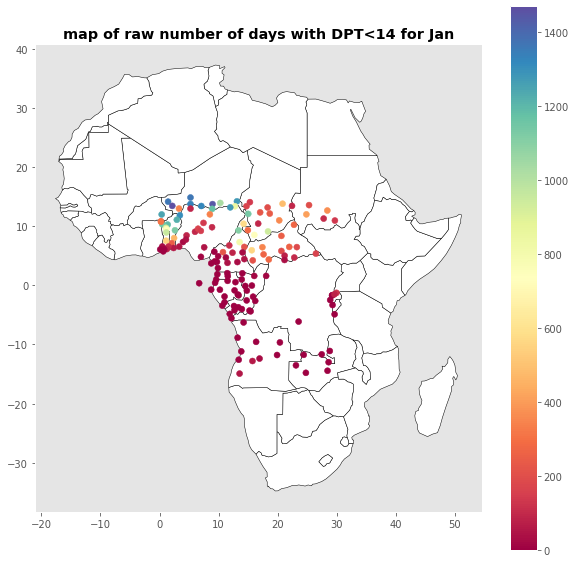

In [103]:
plot('Jan') # for month of january

**map of relative frequency of days with DPT<14**

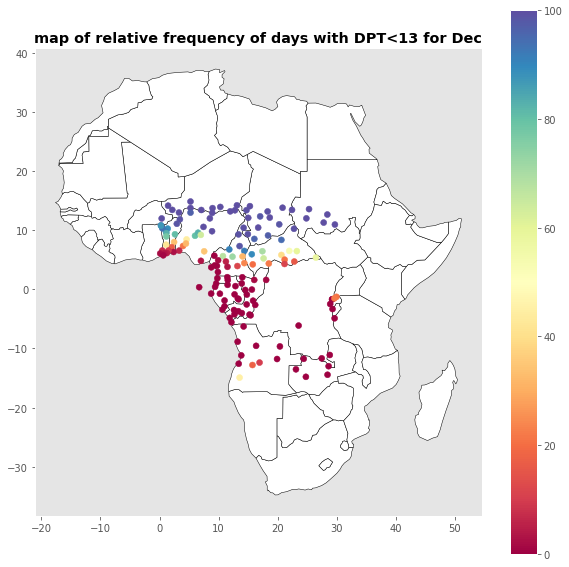

In [99]:
def plot(M,Z):
  """ this function takes 2 arguments
  M:-month(Jan,Feb,Mar,Dec)
  Z:- Dew point thresold""""
  # this is the first dataframe having non missing value
  df=df_Dwp_djfm.notna()
  df=df.reset_index()
  df.rename(columns={'index':'time'},inplace=True)
  df['month']=df.time.dt.month
  df['year']=df.time.dt.year
  df=df.groupby('month').sum()
  # this is second dataframe where dew point temperature is less than 14
  df1=df_Dwp_djfm.apply(lambda x:x<Z).reset_index()
  df1.rename(columns={'index':'time'},inplace=True)
  df1['month']=df1.time.dt.month
  df1['year']=df1.time.dt.year
  df1=df1.groupby(['month']).sum()

  # we divide df1 by df
  data=(df1/df)*100
  data.drop('year',axis=1,inplace=True)
  data.reset_index(inplace=True)
  data.month=data.month.map({1:'Jan',2:'Feb',3:'Mar',12:'Dec'})
  data.set_index('month',inplace=True)
  final_df=pd.DataFrame()
  final_df['freq']=data.loc['Jan']
  final_df=final_df.reset_index()
  final_df['lat']=lat
  final_df['log']=lon

  gdf = geopandas.GeoDataFrame(
    final_df, geometry=geopandas.points_from_xy(final_df.log,final_df.lat))
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to Africa.
  ax = world[world.continent == 'Africa'].plot(
      color='white', edgecolor='black',figsize=(10,10))

  # We can now plot our ``GeoDataFrame``.
  gdf.plot(ax=ax,legend=True,column =gdf['freq'],cmap='Spectral')
  plt.title(f'map of relative frequency of days with DPT<{Z} for {M}',fontweight='bold')
  plt.grid(False);


plot('Dec',13)

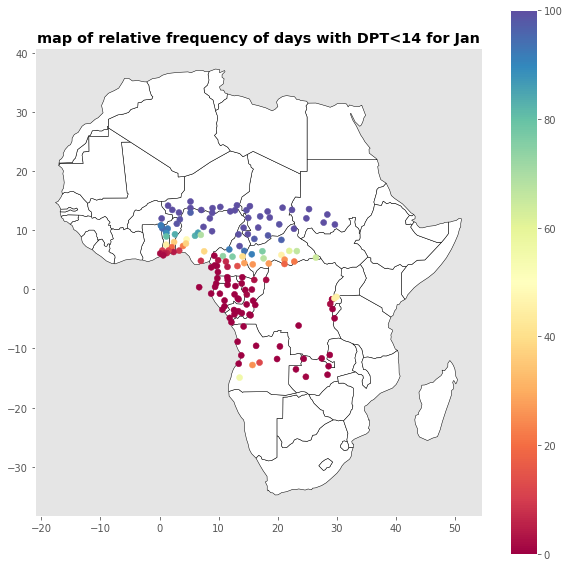

In [100]:
plot('Jan',14) # for the month Jan and we set  dew point thresold  to 14

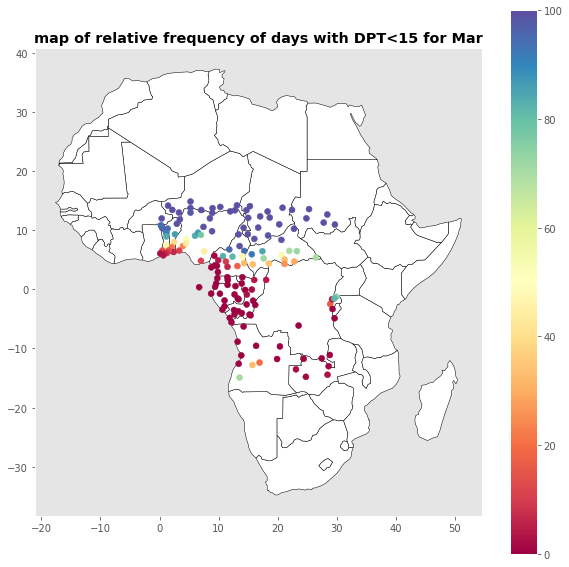

In [101]:
plot('Mar',15) # for the month March and we set  dew point thresold  to 15

How far are days with DPT<14 synchronous across the newtworks of stations? 
spatial coherence in DPT variations 

In [173]:
df=df_Dwp_djfm.reset_index()
df.rename(columns={'index':'time'},inplace=True)

In [174]:
# removes the white space from string 
df.columns = df.columns.str.strip()

In [106]:
df

,time,TILLABERY,TAHOUA,GOURE,NGUIGMI,NIAMEY-AERO,DOSSO,BIRNI-NKONNI,MARADI,DIFFA,...,MONBACA (BENGUELA),HUAMBO (NOVA LISBOA,BIE (SILVA PORTO),LUBANGO (SA DA BAND,MWINILUNGA,MANSA,ZAMBEZI,NDOLA,KAOMA,KABWE
0,1973-12-01,0.000000,-4.388889,NaN,NaN,-1.166667,NaN,NaN,1.222222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1973-12-02,1.388889,-3.000000,NaN,3.666667,2.111111,NaN,1.777778,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1973-12-03,-2.277778,-4.333333,NaN,4.500000,-0.333333,NaN,-0.611111,5.000000,NaN,...,18.388889,14.166667,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1973-12-04,NaN,-3.777778,NaN,2.277778,2.000000,NaN,-0.500000,5.777778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1973-12-05,NaN,-5.777778,NaN,1.500000,-0.666667,NaN,0.277778,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,2021-03-27,0.944444,-14.388889,-3.166667,11.166667,-6.166667,1.166667,-3.722222,-5.166667,8.777778,...,NaN,NaN,15.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5937,2021-03-28,-5.833333,-5.888889,-4.000000,1.111111,-6.777778,-1.000000,-3.222222,-3.666667,5.222222,...,NaN,NaN,15.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5938,2021-03-29,-3.666667,-8.944444,-5.055556,-4.777778,-6.666667,-2.444444,-2.277778,-6.833333,2.277778,...,NaN,NaN,16.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5939,2021-03-30,-6.111111,-16.222222,-4.055556,-0.888889,-9.388889,-3.055556,-5.555556,-9.611111,3.388889,...,NaN,NaN,16.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
#find the index for the given station 
def find_index(x):
  for i in range(len(df.columns)):
    if df.columns[i]==x:
      return f'index of {x} is {i}'

find_index('BANGUI')

'index of BANGUI is 65'

In [183]:
# here I am taking condition where Station  Bangui record less than 14
mask=df['BANGUI']<14
df1=df[mask]
df1

,time,TILLABERY,TAHOUA,GOURE,NGUIGMI,NIAMEY-AERO,DOSSO,BIRNI-NKONNI,MARADI,DIFFA,...,MONBACA (BENGUELA),HUAMBO (NOVA LISBOA,BIE (SILVA PORTO),LUBANGO (SA DA BAND,MWINILUNGA,MANSA,ZAMBEZI,NDOLA,KAOMA,KABWE
37,1974-12-07,-0.722222,4.000000,NaN,2.500000,1.611111,NaN,-0.777778,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1977-12-26,-2.000000,-1.222222,NaN,2.833333,1.777778,NaN,0.833333,0.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,1977-12-27,-2.611111,-5.333333,NaN,1.777778,1.166667,NaN,0.666667,1.388889,NaN,...,NaN,NaN,NaN,11.777778,NaN,NaN,NaN,NaN,NaN,NaN
151,1977-12-28,-2.833333,-5.444444,NaN,0.000000,1.000000,NaN,-0.722222,1.222222,NaN,...,21.5,NaN,NaN,9.277778,NaN,18.777778,NaN,NaN,NaN,NaN
172,1978-12-18,4.000000,0.500000,NaN,-1.777778,1.222222,NaN,NaN,-2.722222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,2004-03-07,-4.388889,-7.000000,-6.722222,-0.722222,0.222222,NaN,-1.666667,-4.888889,-2.722222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5390,2004-03-08,-5.722222,-7.666667,-7.500000,-0.944444,-0.166667,NaN,-0.555556,-5.777778,-4.277778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5476,2007-03-01,3.944444,-7.611111,-6.944444,-2.944444,-9.000000,NaN,-5.222222,-3.055556,-3.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5892,2020-03-14,-3.000000,-7.611111,-3.222222,NaN,-6.500000,-0.055556,0.000000,-3.444444,3.166667,...,NaN,17.833333,17.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df1.set_index('time',inplace=True)

In [186]:
df1.loc['1974-12-07'].values[0]

array([-0.72222222,  4.        ,         nan,  2.5       ,  1.61111111,
               nan, -0.77777778,         nan,         nan, -2.27777778,
               nan,         nan,  3.22222222,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 23.        ,         nan,         nan,         nan,
               nan,         nan, 20.5       ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
       13.5       ,  4.77777778, 11.        ,         nan, 13.5       ,
               nan,         nan, 13.77777778,         nan,      

In [189]:
def counter(d,x):
  """ this function return number of the station having less than given threshold value
  d:- date
  x:- is threshold value
   """

  c=0
  for item in df1.loc[d].values[0]:
      if item <x:

        c+=1
  return c
      
counter('1974-12-07',14)

34

In [191]:
#taking all dates only from timestamp
c=[]
for i in range(len(df1.index)):
  c.append(str(df1.index[i]).split(' ')[0])

In [192]:
#passing dates to fucntion and storing number obtained in the list
number=[]
for i in c:
  number.append(counter(i,14))

In [193]:
df4=pd.DataFrame()
df4['date']=c
df4['num']=number
df4['date']=pd.to_datetime(df4['date'])

In [194]:
df4['month']=df4['date'].dt.month
df4['year']=df4['date'].dt.year
df4['day']=df4['date'].dt.day
df4

,date,num,month,year,day
0,1974-12-07,34,12,1974,7
1,1977-12-26,53,12,1977,26
2,1977-12-27,52,12,1977,27
3,1977-12-28,41,12,1977,28
4,1978-12-18,23,12,1978,18
...,...,...,...,...,...
549,2004-03-07,34,3,2004,7
550,2004-03-08,23,3,2004,8
551,2007-03-01,23,3,2007,1
552,2020-03-14,25,3,2020,14


In [199]:
pd.crosstab([df4.month,df4.day],df4.year,values=df4.num,aggfunc=np.sum)

year       1974  1976  1977  1978  1979  1980  1981  1982  1983  1984  ...  \
month day                                                              ...   
1     1     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
      2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
      3     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
      4     NaN   NaN   NaN  39.0   NaN   NaN  27.0   NaN   NaN   NaN  ...   
      5     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  32.0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
12    27    NaN   NaN  52.0   NaN   NaN  34.0   NaN   NaN   NaN   NaN  ...   
      28    NaN   NaN  41.0   NaN   NaN  31.0   NaN   NaN   NaN   NaN  ...   
      29    NaN   NaN   NaN   NaN   NaN  27.0   NaN   NaN   NaN   NaN  ...   
      30    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
      31    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

year       2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
month day                                                              
1     1     NaN  31.0   NaN   NaN  37.0   NaN   NaN   NaN  43.0   NaN  
      2     NaN  41.0   NaN   NaN  38.0   NaN   NaN   NaN  52.0   NaN  
      3     NaN   NaN   NaN  32.0   NaN   NaN  37.0   NaN  52.0   NaN  
      4     NaN   NaN   NaN  32.0  42.0   NaN  42.0   NaN  49.0   NaN  
      5     NaN   NaN   NaN  37.0   NaN   NaN  42.0   NaN  50.0   NaN  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
12    27   32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
      28    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
      29    NaN   NaN   NaN  32.0   NaN   NaN   NaN   NaN   NaN   NaN  
      30    NaN   NaN   NaN  36.0   NaN   NaN   NaN   NaN   NaN   NaN  
      31    NaN   NaN   NaN  35.0   NaN   NaN   NaN   NaN   NaN   NaN  

[95 rows x 42 columns]